In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('C:/AMEYA/UW/Academics/DATA 515/Project/FitMe/database/heartrate_seconds_merged.csv')

In [47]:
df.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [48]:
df['Time'] = pd.to_datetime(df['Time'])

In [49]:
df1 = df[df['Id'] == 2026352035]

In [50]:
df1.head(2)

,Id,Time,Value
154104,2026352035,2016-04-17 05:30:20,70
154105,2026352035,2016-04-17 05:30:30,66


In [55]:
df1.set_index('Time')['Value'].resample('D').mean()

Time
2016-04-17    68.656250
2016-04-18          NaN
2016-04-19          NaN
2016-04-20          NaN
2016-04-21          NaN
2016-04-22          NaN
2016-04-23          NaN
2016-04-24          NaN
2016-04-25    99.505814
2016-04-26          NaN
2016-04-27          NaN
2016-04-28          NaN
2016-04-29          NaN
2016-04-30          NaN
2016-05-01          NaN
2016-05-02    84.134571
2016-05-03          NaN
2016-05-04          NaN
2016-05-05          NaN
2016-05-06          NaN
2016-05-07          NaN
2016-05-08          NaN
2016-05-09    98.233901
Freq: D, Name: Value, dtype: float64

In [59]:
df1['Daily aggregate'] = df1.resample('D', on = 'Time')['Value'].transform('mean')

<ipython-input-59-7324d4e2a370>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Daily aggregate'] = df1.resample('D', on = 'Time')['Value'].transform('mean')


In [60]:
df1.shape

(2490, 4)

In [61]:
df1.head()

,Id,Time,Value,Daily aggregate
154104,2026352035,2016-04-17 05:30:20,70,68.65625
154105,2026352035,2016-04-17 05:30:30,66,68.65625
154106,2026352035,2016-04-17 05:30:40,67,68.65625
154107,2026352035,2016-04-17 05:30:55,67,68.65625
154108,2026352035,2016-04-17 05:31:10,67,68.65625


In [8]:
days = pd.to_datetime(df1['Time']).dt.weekday
df1['Day'] = days 

<ipython-input-8-fda1a635cfd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Day'] = days


In [9]:
df1.head()

,Id,Time,Value,Day
154104,2026352035,2016-04-17 05:30:20,70,6
154105,2026352035,2016-04-17 05:30:30,66,6
154106,2026352035,2016-04-17 05:30:40,67,6
154107,2026352035,2016-04-17 05:30:55,67,6
154108,2026352035,2016-04-17 05:31:10,67,6


In [10]:
dayvsvalue = df1.groupby('Day').Value.mean()

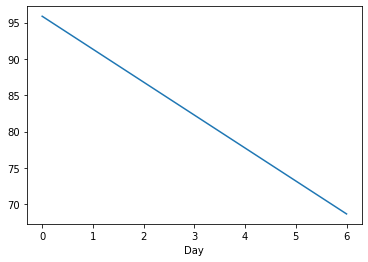

In [11]:
dayvsvalue.plot()

In [12]:
sleep = pd.read_csv('C:/AMEYA/UW/Academics/DATA 515/Project/FitMe/database/sleepDay_merged.csv')

In [13]:
# set(list(sleep['Id'].unique())).intersection(list(df['Id'].unique()))

In [14]:
sleep.rename(columns = {'SleepDay': 'Time'}, inplace = True)

In [15]:
sleep.head(2)

,Id,Time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407


In [16]:
sleep['Time'] = sleep['Time'].str.rstrip(' AM')

In [17]:
sleep.head(2)

,Id,Time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00,1,327,346
1,1503960366,4/13/2016 12:00:00,2,384,407


In [18]:
sleep['Time'] = pd.to_datetime(sleep['Time'], format='%m/%d/%Y %H:%M:%S')

In [19]:
sleep.head(2)

,Id,Time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12 12:00:00,1,327,346
1,1503960366,2016-04-13 12:00:00,2,384,407


In [20]:
sleep1 = sleep[sleep['Id'] == 2026352035]

In [21]:
df1.merge(sleep1, on = 'Id', how = 'left')

,Id,Time_x,Value,Day,Time_y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,2026352035,2016-04-17 05:30:20,70,6,2016-04-12 12:00:00,1,503,546
1,2026352035,2016-04-17 05:30:20,70,6,2016-04-13 12:00:00,1,531,565
2,2026352035,2016-04-17 05:30:20,70,6,2016-04-14 12:00:00,1,545,568
3,2026352035,2016-04-17 05:30:20,70,6,2016-04-15 12:00:00,1,523,573
4,2026352035,2016-04-17 05:30:20,70,6,2016-04-16 12:00:00,1,524,567
...,...,...,...,...,...,...,...,...
69715,2026352035,2016-05-09 19:49:45,89,0,2016-05-08 12:00:00,1,541,568
69716,2026352035,2016-05-09 19:49:45,89,0,2016-05-09 12:00:00,1,531,556
69717,2026352035,2016-05-09 19:49:45,89,0,2016-05-10 12:00:00,1,357,380
69718,2026352035,2016-05-09 19:49:45,89,0,2016-05-11 12:00:00,1,523,553


In [24]:
df1 = df1.set_index('Time') 

In [18]:
import pandas as pd
import seaborn as sns

In [6]:
heartrate_seconds = pd.read_csv('C:/AMEYA/UW/Academics/DATA 515/Project/FitMe/database/heartrate_seconds_merged.csv')

In [7]:
heartrate_seconds.head(2)

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102


In [8]:
heartrate_seconds['date_time'] = pd.to_datetime(heartrate_seconds['Time'], format = "%m/%d/%Y %I:%M:%S %p")

In [9]:
heartrate_minute = heartrate_seconds.groupby('Id').resample('1min', on = 'date_time', origin = '2016-04-12 07:21:00').Value.mean().reset_index()

In [50]:
heartrate_daily = heartrate_seconds.groupby('Id').resample('1D', on = 'date_time', origin = '2016-04-12 07:21:00').Value.mean().reset_index()

In [53]:
heartrate_daily.head(2)

,Id,date_time,Value
0,2022484408,2016-04-12 07:21:00,75.457695
1,2022484408,2016-04-13 07:21:00,80.779593


In [54]:
heartrate_daily['date_time'] = pd.to_datetime(heartrate_daily['date_time'], format = "%m/%d/%Y %I:%M:%S %p")

In [20]:
df = heartrate_minute[:1000]

<AxesSubplot:xlabel='date_time', ylabel='Value'>

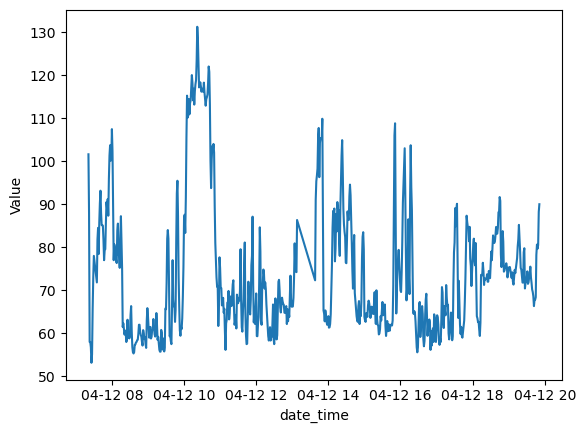

In [21]:
sns.lineplot(x = df['date_time'], y = df['Value'])

In [22]:
minute_steps = pd.read_csv('C:/AMEYA/UW/Academics/DATA 515/Project/FitMe/database/minuteStepsNarrow_merged.csv')
minute_mets = pd.read_csv('C:/AMEYA/UW/Academics/DATA 515/Project/FitMe/database/minuteMETsNarrow_merged.csv')
minute_calories = pd.read_csv('C:/AMEYA/UW/Academics/DATA 515/Project/FitMe/database/minuteCaloriesNarrow_merged.csv')

In [23]:
# retype to datetime instead of object
minute_steps['date_time'] = pd.to_datetime(minute_steps['ActivityMinute'], format = '%m/%d/%Y %I:%M:%S %p')
minute_mets['date_time'] = pd.to_datetime(minute_mets['ActivityMinute'], format = '%m/%d/%Y %I:%M:%S %p')
minute_calories['date_time'] = pd.to_datetime(minute_calories['ActivityMinute'], format = '%m/%d/%Y %I:%M:%S %p')

In [28]:
# merge the minute tables together
minute_values = heartrate_minute.merge(minute_steps, how = 'left', on = ['Id', 'date_time'])
minute_values = minute_values.merge(minute_mets, how = 'left', on = ['Id', 'date_time'])
minute_values = minute_values.merge(minute_calories, how = 'left', on = ['Id', 'date_time'])

In [25]:
minute_values

,Id,date_time,Value,ActivityMinute_x,Steps,ActivityMinute_y,METs,ActivityMinute,Calories
0,2022484408,2016-04-12 07:21:00,101.600000,4/12/2016 7:21:00 AM,17.0,4/12/2016 7:21:00 AM,32.0,4/12/2016 7:21:00 AM,3.32064
1,2022484408,2016-04-12 07:22:00,87.888889,4/12/2016 7:22:00 AM,9.0,4/12/2016 7:22:00 AM,38.0,4/12/2016 7:22:00 AM,3.94326
2,2022484408,2016-04-12 07:23:00,58.000000,4/12/2016 7:23:00 AM,0.0,4/12/2016 7:23:00 AM,13.0,4/12/2016 7:23:00 AM,1.34901
3,2022484408,2016-04-12 07:24:00,58.000000,4/12/2016 7:24:00 AM,0.0,4/12/2016 7:24:00 AM,10.0,4/12/2016 7:24:00 AM,1.03770
4,2022484408,2016-04-12 07:25:00,56.777778,4/12/2016 7:25:00 AM,0.0,4/12/2016 7:25:00 AM,10.0,4/12/2016 7:25:00 AM,1.03770
...,...,...,...,...,...,...,...,...,...
542344,8877689391,2016-05-12 14:40:00,56.222222,NaN,NaN,NaN,NaN,NaN,NaN
542345,8877689391,2016-05-12 14:41:00,57.857143,NaN,NaN,NaN,NaN,NaN,NaN
542346,8877689391,2016-05-12 14:42:00,56.000000,NaN,NaN,NaN,NaN,NaN,NaN
542347,8877689391,2016-05-12 14:43:00,57.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
daily_steps = pd.read_csv('C:/AMEYA/UW/Academics/DATA 515/Project/FitMe/database/dailySteps_merged.csv')
daily_calories = pd.read_csv('C:/AMEYA/UW/Academics/DATA 515/Project/FitMe/database/dailyCalories_merged.csv')
daily_intensities = pd.read_csv('C:/AMEYA/UW/Academics/DATA 515/Project/FitMe/database/dailyIntensities_merged.csv')
daily_activity = pd.read_csv('C:/AMEYA/UW/Academics/DATA 515/Project/FitMe/database/dailyActivity_merged.csv')
daily_sleep = pd.read_csv('C:/AMEYA/UW/Academics/DATA 515/Project/FitMe/database/sleepDay_merged.csv')

In [56]:
# retype to datetime instead of object
daily_steps['date_time'] = pd.to_datetime(daily_steps['ActivityDay'], format = '%m/%d/%Y')
daily_calories['date_time'] = pd.to_datetime(daily_calories['ActivityDay'], format = '%m/%d/%Y')
daily_intensities['date_time'] = pd.to_datetime(daily_intensities['ActivityDay'], format = '%m/%d/%Y')
daily_activity['date_time'] = pd.to_datetime(daily_activity['ActivityDate'], format = '%m/%d/%Y')
daily_sleep['date_time'] = pd.to_datetime(daily_sleep['SleepDay'], format = '%m/%d/%Y %I:%M:%S %p')

In [58]:
heartrate_daily['date_time'] = heartrate_daily['date_time'].dt.date

In [64]:
heartrate_daily['date_time'] = pd.to_datetime(heartrate_daily['date_time'], format = "%Y/%m/%d")

In [67]:
# merge the daily tables together
daily_values = heartrate_daily.merge(daily_steps, how = 'left', on = ['Id', 'date_time'])

In [79]:
daily_values = daily_values.merge(daily_calories, how = 'left', on = ['Id', 'date_time'])

In [71]:
daily_values = daily_values.merge(daily_intensities, how = 'left', on = ['Id', 'date_time'])

In [73]:
daily_values = daily_values.merge(daily_activity, how = 'left', on = ['Id', 'date_time'])

In [76]:
daily_values = daily_values.merge(daily_sleep, how = 'left', on = ['Id', 'date_time'])

In [78]:
daily_values.to_csv('daily_values.csv')